In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from scipy import stats

In [2]:
data = pd.read_csv("HospitalAdmissionsData.csv")

In [5]:
data.head()

,ID,AdmissionLengthDays,Death_1,Admission_Type,Insurance_Type,EnglishLanguage_1,Religion_Type,Married_1,Race,Dx
0,42862,4.277778,0,elective,private,1,episcopalian,1,white,mitral stenosis\mitral valve replacement /sda
1,5967,26.122917,0,elective,private,0,catholic,1,white,duodenal mass/sda
2,50952,7.028472,1,emergency,medicare,1,catholic,0,asian - japanese,? serotonin syndrome
3,17138,34.187500,0,elective,medicare,1,catholic,1,white,abdominal aortic aneurysm/sda
4,27703,6.165972,0,elective,government,0,protestant quaker,0,black/african american,absence/sda


In [3]:
num_columns = len(data.columns)

In [6]:
#4 integers 1 float
data.dtypes

ID                       int64
AdmissionLengthDays    float64
Death_1                  int64
Admission_Type          object
Insurance_Type          object
EnglishLanguage_1        int64
Religion_Type           object
Married_1                int64
Race                    object
Dx                      object
dtype: object

In [11]:
#Admission type, insurance type, religion type, race and Dx are objects
data["AdmissionLengthDays"].describe()

count    58863.000000
mean        10.138978
std         12.465611
min         -0.945139
25%          3.743056
50%          6.465972
75%         11.798264
max        294.660417
Name: AdmissionLengthDays, dtype: float64

In [18]:
data.Admission_Type.value_counts()

emergency    41987
newborn       7863
elective      7691
urgent        1322
Name: Admission_Type, dtype: int64

In [19]:
data.Insurance_Type.value_counts()

medicare      28157
private       22534
medicaid       5781
government     1781
self pay        610
Name: Insurance_Type, dtype: int64

In [20]:
data.Religion_Type.value_counts()

catholic                  20561
not specified             11740
unobtainable               8254
protestant quaker          7117
jewish                     5308
other                      2686
episcopalian                774
greek orthodox              458
christian scientist         429
buddhist                    266
muslim                      225
jehovah's witness           139
unitarian-universalist      124
hindu                       113
romanian east. orth          83
7th day adventist            81
baptist                      26
hebrew                       16
methodist                     7
lutheran                      1
Name: Religion_Type, dtype: int64

In [21]:
data.Race.value_counts()

white                                                       40927
black/african american                                       5433
unknown/not specified                                        4493
hispanic or latino                                           1696
other                                                        1510
asian                                                        1506
unable to obtain                                              814
patient declined to answer                                    557
asian - chinese                                               277
hispanic/latino - puerto rican                                232
black/cape verdean                                            200
white - russian                                               164
multi race ethnicity                                          130
black/haitian                                                 101
asian - asian indian                                           85
white - ot

In [22]:
data.Dx.value_counts()

newborn                                                                                     7823
pneumonia                                                                                   1566
sepsis                                                                                      1184
congestive heart failure                                                                     928
coronary artery disease                                                                      840
                                                                                            ... 
atherosclerosis;claudication                                                                   1
te fistula,aspiration                                                                          1
acute on chronic sdh                                                                           1
chest pain/dyspnea                                                                             1
increasing shortness of breath

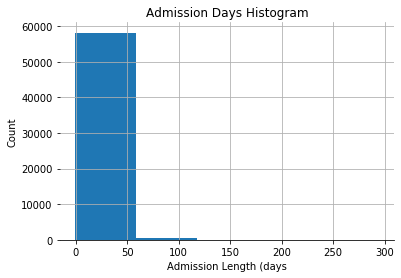

In [30]:
histo = data.hist(column = "AdmissionLengthDays", bins = 5)
histo = histo[0]
for x in histo:
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)
        
    x.set_title("Admission Days Histogram")
    x.set_xlabel("Admission Length (days")
    x.set_ylabel("Count")

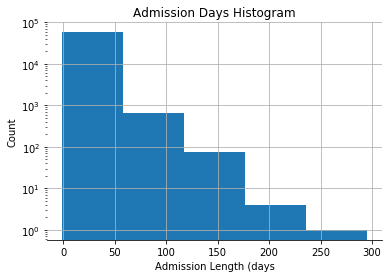

In [31]:
histo = data.hist(column = "AdmissionLengthDays", bins = 5)
histo = histo[0]
for x in histo:
    x.set_yscale('log')
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)
        
    x.set_title("Admission Days Histogram")
    x.set_xlabel("Admission Length (days")
    x.set_ylabel("Count")
    #The admission length days scales lograithmically instead of linearly

Text(0.5, 0, 'Death')

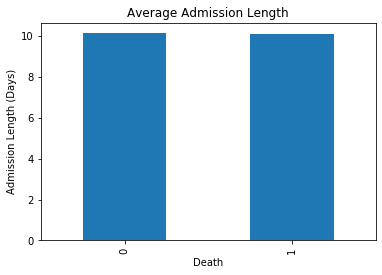

In [41]:
byD = data.groupby("Death_1")
plot = byD["AdmissionLengthDays"].mean().plot(kind = 'bar')
plot.set_title("Average Admission Length")
plot.set_ylabel("Admission Length (Days)")
plot.set_xlabel("Death")

In [107]:
contingency = data[["Death_1","Insurance_Type"]]
contingency = contingency.astype('category')
mapper = {"medicare":0, "medicaid":1, "private":2, "government":3, "self pay": 4}
contingency = contingency.replace({"Insurance_Type":mapper})
contingency.dtypes
contingency = contingency.astype('int64')

In [108]:
contingency.head()

,Death_1,Insurance_Type
0,0,2
1,0,2
2,1,0
3,0,0
4,0,3


In [109]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

ValueError: The internally computed table of expected frequencies has a zero element at (3, 0).